In [23]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
%matplotlib inline

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

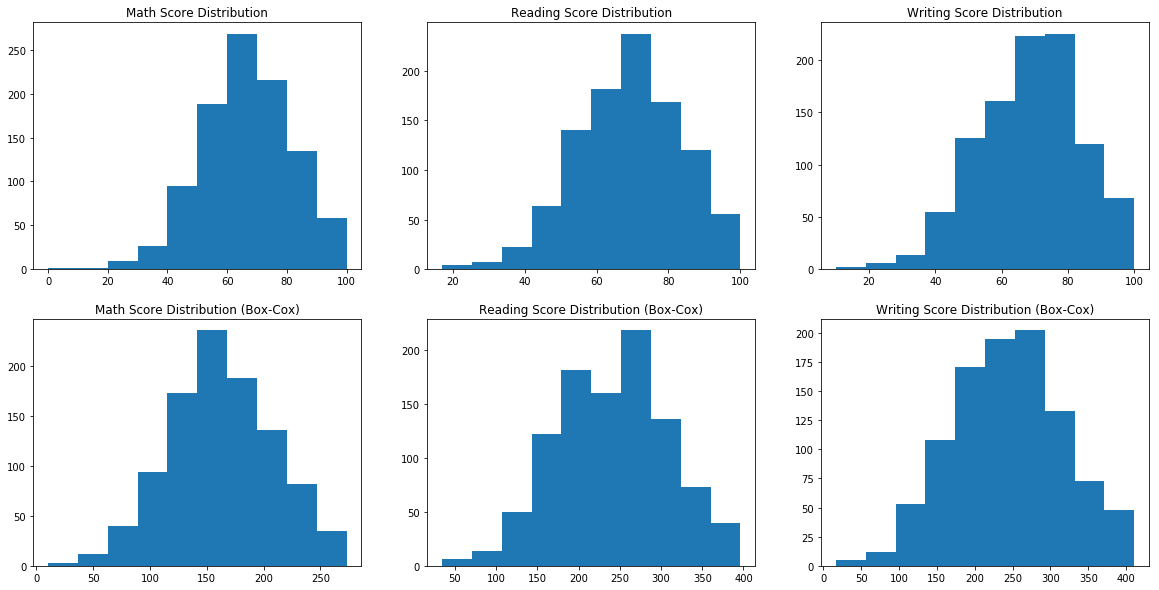

In [20]:
# What do the ",_" after the variable names do???

math_boxcox,_ = boxcox(df[df['math score'] > 0]['math score'])
reading_boxcox,_ = boxcox(df['reading score'])
writing_boxcox,_ = boxcox(df['writing score'])

plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(df['math score'])
plt.title('Math Score Distribution')

plt.subplot(2, 3, 2)
plt.hist(df['reading score'])
plt.title('Reading Score Distribution')

plt.subplot(2, 3, 3)
plt.hist(df['writing score'])
plt.title('Writing Score Distribution')

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title('Math Score Distribution (Box-Cox)')

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title('Reading Score Distribution (Box-Cox)')

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title('Writing Score Distribution (Box-Cox)')

plt.show()


# Why don't these work?

# f, axes = plt.subplots(2, 3, figsize=(15, 10))
# plt.tight_layout()

# sns.distplot(df['math score'], ax = [0, 0], axlabel = '').set_title('Math Score Distribution')
# sns.distplot(df['reading score'], ax = [0, 1], axlabel = '').set_title('Reading Score Distribution')
# sns.distplot(df['writing score'], ax = [0, 2], axlabel = '').set_title('Writing Score Distribution')
# sns.distplot(math_boxcox, axlabel = '').set_title('Math Score Distribution (Box-Cox)')
# sns.distplot(reading_boxcox, ax = [1, 1], axlabel = '').set_title('Reading Score Distribution (Box-Cox)')
# sns.distplot(writing_boxcox, ax = [1, 2], axlabel = '').set_title('Writing Score Distribution (Box-Cox)')

In [29]:
jb = jarque_bera(df["math score"])
norm = normaltest(df["math score"])

print('Math')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

jb = jarque_bera(df["reading score"])
norm = normaltest(df["reading score"])

print('')
print('Reading')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

jb = jarque_bera(df["writing score"])
norm = normaltest(df["writing score"])

print('')
print('Writing')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

Math
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836

Reading
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582

Writing
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [31]:
jb = jarque_bera(math_boxcox)
norm = normaltest(math_boxcox)

print('Math')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

jb = jarque_bera(reading_boxcox)
norm = normaltest(reading_boxcox)

print('')
print('Reading')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

jb = jarque_bera(writing_boxcox)
norm = normaltest(writing_boxcox)

print('')
print('Writing')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

Math
Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037

Reading
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467

Writing
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


The distributions are not normally distributed initially. After applying the Box-Cox transformation they are much closer to being normally distributed

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

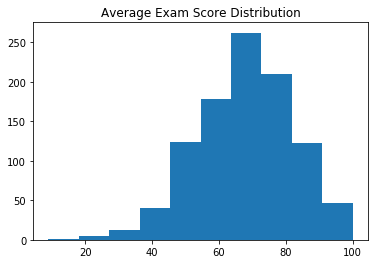

This is not normally distributed
Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [36]:
avg_score = (df['math score'] + df['reading score'] + df['writing score'])/3

plt.hist(avg_score)
plt.title('Average Exam Score Distribution')
plt.show()

print('This is not normally distributed')

jb = jarque_bera(avg_score)
norm = normaltest(avg_score)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))

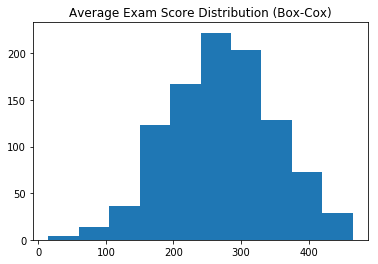

Box-Cox Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Box-Cox Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478

The transformed variable visually looks much more normally distributed, and the Jarque-Bera and Normality tests confirm this


In [42]:
avg_boxcox,_ = boxcox(avg_score)

plt.hist(avg_boxcox)
plt.title('Average Exam Score Distribution (Box-Cox)')
plt.show()

jb = jarque_bera(avg_score)
norm = normaltest(avg_score)
print("Box-Cox Jarque-Bera test statistics is {0} and p value is {1}".format(jb[0], jb[1]))
print("Box-Cox Normality test statistics is {0} and p value is {1}".format(norm[0], norm[1]))
print('')
print('The transformed variable visually looks much more normally distributed, and the Jarque-Bera and Normality tests confirm this')

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

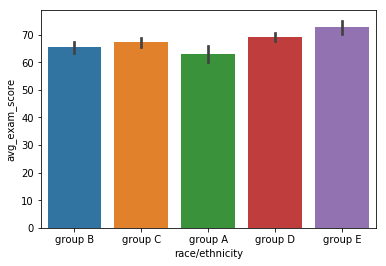

In [67]:
df['avg_exam_score'] = avg_score

group_index = ['group A', 'group B', 'group C', 'group D', 'group E']
sns.barplot(x = 'race/ethnicity', y = 'avg_exam_score', data = df)

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

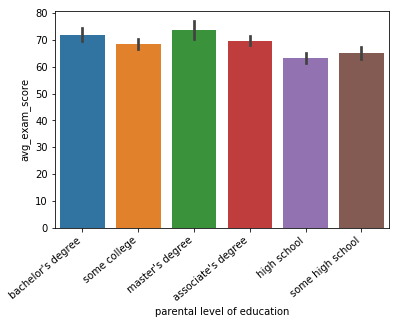

In [76]:
ed = sns.barplot(x = 'parental level of education', y = 'avg_exam_score', data = df)
ed.set_xticklabels(ed.get_xticklabels(), rotation=40, ha="right")

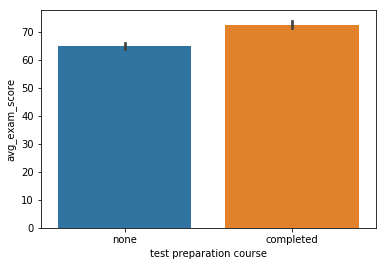

In [70]:
sns.barplot(x = 'test preparation course', y = 'avg_exam_score', data = df)

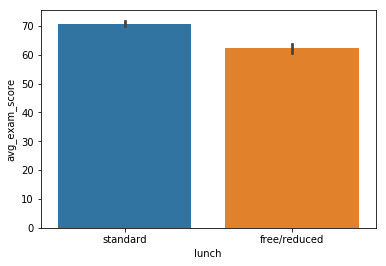

In [72]:
sns.barplot(x = 'lunch', y = 'avg_exam_score', data = df)

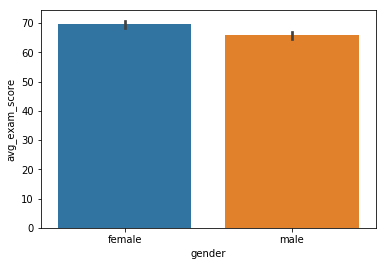

In [74]:
sns.barplot(x = 'gender', y = 'avg_exam_score', data = df)

All of the variables seem to have some level of correlation with exam sucess.